In [21]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Tesla Data

In [22]:
tesla = yf.Ticker("TSLA")
tesla_data = tesla.history("max")
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


# Tesla Revenue Scrap

In [23]:
from model import FetcherMain

#  Tesla Revenue Data

In [24]:
see = FetcherMain('https://companiesmarketcap.com/tesla/revenue/')
tables = see.get_tag('table')
tags_in_table = see.get_tags_in_table(tables[0], 'tr')
clean = see.cleaner(tags_in_table)
objects = see.slicer(clean, 2,-2,None)
df = see.pandas_frame(objects)
see.rename_df_col(df, 0, 'major')
df['Year'] = df['major'].str[0:4]
df['Revenue'] = df['major'].str[4:9]
df['Change'] = df['major'].str[9:]
df.drop(columns=['major'], inplace=True)
df.reset_index(inplace=True)
df.tail()

,index,Year,Revenue,Change
7,7,2015,$4.04,B26.5%
8,8,2014,$3.19,B58.85%
9,9,2013,$2.01,B387.23%
10,10,2012,$0.41,B102.34%
11,11,2011,$0.20,B74.95%


# Game Data

In [29]:
games = yf.Ticker("GME")
games_data = tesla.history("max")
games_data.reset_index(inplace=True)
games_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620129,1.693350,1.603296,1.691667,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716074,1.670626,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615920,1.662210,1.603296,1.662210,6892800,0.0,0.0


#  GME Revenue Data

In [26]:
see = FetcherMain('https://companiesmarketcap.com/gamestop/revenue/')
tables = see.get_tag('table')
tags_in_table = see.get_tags_in_table(tables[0], 'tr')
clean = see.cleaner(tags_in_table)
objects = see.slicer(clean, 2,-2,None)
df = see.pandas_frame(objects)
see.rename_df_col(df, 0, 'major')
df['Year'] = df['major'].str[0:4]
df['Revenue'] = df['major'].str[4:9]
df['Change'] = df['major'].str[9:]
df.drop(columns=['major'], inplace=True)
df.reset_index(inplace=True)
df.tail()

,index,Year,Revenue,Change
14,14,2008,$8.17,B25.21%
15,15,2007,$6.53,B39.52%
16,16,2006,$4.68,B119.43%
17,17,2005,$2.13,B21.27%
18,18,2004,$1.75,B19.38%


# Make Graph Function

In [27]:
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    plt.plot(stock_data.index, stock_data['Close'])
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.grid(True)
    plt.show()

# Tesla Graph

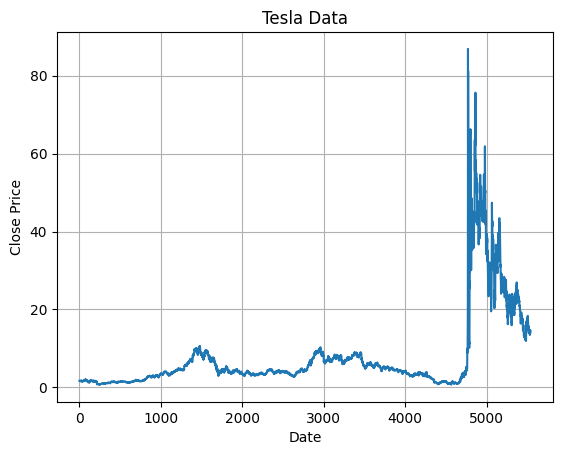

In [28]:
make_graph(tesla_data,'Tesla Data')

# Game Stock Graph

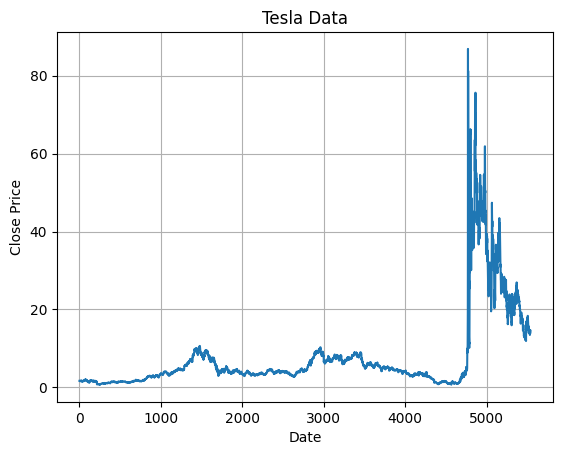

In [30]:
make_graph(games_data,'Tesla Data')

# Excuse me I just didn't fix the date format
### I didn't know if need the day or the time
#### But yeah I understood it.